In [100]:
import warnings
warnings.filterwarnings(action='ignore') 

In [101]:
import pandas as pd

## 데이터 가져오기

- 버스 정류장별 승하차 : https://data.seoul.go.kr/dataList/OA-12913/S/1/datasetView.do
- 버스 정류소 위치정보 : https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

## 시간별 승하차인원 전처리

In [102]:
bus=pd.read_csv('서울시 버스노선별 정류장별 시간대별 승하차 인원 정보.csv',encoding='cp949')

In [133]:
bus

,Unnamed: 0,code,station,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y,07-10,10-17,17-22,commute,Total,com70
0,0,1001,종로2가사거리,275.317204,163.225806,149.156682,169.762673,154.629032,146.658065,37.569764,126.987786,219.271505,159.459677,150.643548,369.915054,529.374731,0
1,1,1002,창경궁.서울대학교병원,276.752169,487.524164,190.707913,139.964418,181.108550,37.647584,37.579179,126.996520,382.138166,165.336166,109.378067,491.516233,656.852399,1
2,2,1003,명륜3가.성대입구,257.345725,382.850062,254.162507,224.906001,310.292937,119.232714,37.582709,126.998290,320.097893,239.534254,214.762825,534.860719,774.394973,0
3,3,1004,종로2가.삼일교,31.812500,166.361979,108.092634,109.463170,174.043750,100.357812,37.568582,126.987507,99.087240,108.777902,137.200781,236.288021,345.065923,0
4,4,1005,혜화동로터리.여운형활동터,202.938076,276.624506,132.341615,241.552230,108.711462,169.750988,37.586230,127.001694,239.781291,186.946923,139.231225,379.012516,565.959439,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10629,10822,25758,고덕리엔파크3단지.2단지,51.725490,208.764706,84.764706,155.369748,127.588235,214.141176,37.557130,127.172576,130.245098,120.067227,170.864706,301.109804,421.177031,0
10630,10823,25760,가래여울,1.313725,209.705882,1.915966,107.142857,2.129412,69.129412,37.576545,127.168974,105.509804,54.529412,35.629412,141.139216,195.668627,0
10631,10828,25785,강동리버스트4단지,729.740741,3.037037,295.777778,3.015873,156.333333,3.644444,37.573357,127.170805,366.388889,149.396825,79.988889,446.377778,595.774603,1
10632,10829,25786,강동리버스트4단지,2.296296,194.000000,1.825397,152.968254,3.288889,423.822222,37.572898,127.171137,98.148148,77.396825,213.555556,311.703704,389.100529,1


- 버스정류장ARS번호 기준으로 groupby를 하기위해 
- 버스정류장ARS번호 안에들어가있는 불필요한 정보 '~'를 제거하고
- groupby를 원활하게하기위해 데이터타입을 int64으로 변경 (뒤에있을 좌표데이터의 데이터타입과 동일시 하기위해 int64)

In [103]:
bus1=bus[bus.버스정류장ARS번호 != '~']

In [104]:
bus2=bus1.astype({'버스정류장ARS번호':'int64'})

- 원하는 데이터로 가공
- 아침 출근시간 , 출근시간 이후 ,퇴근시간 이후 3단계로 분류 하여 유동인구 체크

In [105]:

bus2['07-10 on avg']=(bus2['7시승차총승객수']+bus2['8시승차총승객수']+bus2['9시승차총승객수'])/3
bus2['07-10 off avg']=(bus2['7시하차총승객수']+bus2['8시하차총승객수']+bus2['9시하차총승객수'])/3
bus2['10-17 on avg']=(bus2['10시승차총승객수']+bus2['11시승차총승객수']+bus2['12시승차총승객수']+bus2['13시승차총승객수']+bus2['14시승차총승객수']+bus2['15시승차총승객수']+bus2['16시승차총승객수'])/7
bus2['10-17 off avg']=(bus2['10시하차총승객수']+bus2['11시하차총승객수']+bus2['12시하차총승객수']+bus2['13시하차총승객수']+bus2['14시하차총승객수']+bus2['15시하차총승객수']+bus2['16시하차총승객수'])/7
bus2['17-22 on avg']=(bus2['17시승차총승객수']+bus2['18시승차총승객수']+bus2['19시승차총승객수']+bus2['20시승차총승객수']+bus2['21시승차총승객수'])/5
bus2['17-22 off avg']=(bus2['17시하차총승객수']+bus2['18시하차총승객수']+bus2['19시하차총승객수']+bus2['20시하차총승객수']+bus2['21시하차총승객수'])/5

In [106]:
bus2

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg
0,202111,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리,202,103,95,140,...,132,213,97,20211203,464.000000,369.333333,303.857143,356.428571,352.0,350.2
1,202111,N37,N37번(진관공영차고지~송파공영차고지),100000001,1001,종로2가사거리,0,0,0,0,...,0,0,0,20211203,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,202111,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리,12,7,213,346,...,0,0,0,20211203,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,202111,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리,59,78,0,0,...,146,181,81,20211203,654.666667,345.000000,406.428571,401.428571,356.4,350.8
4,202111,172,172번(하계동~월드컵2.3단지),100000002,1002,창경궁.서울대학교병원,0,0,0,0,...,37,24,6,20211203,246.333333,491.666667,250.857143,232.142857,231.6,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625021,202008,9714,9714번(교하운정~서울역),277103814,63735,난방공사(가상),0,0,0,0,...,1,0,1,20200903,0.000000,0.000000,0.000000,0.000000,0.0,0.0
625022,202008,673,673번(상동기점~이대부고),277104249,15452,고강지하차도입구(경유),0,2,0,0,...,5,0,2,20200903,0.000000,0.666667,0.142857,1.285714,0.0,4.2
625023,202008,673,673번(상동기점~이대부고),277104250,15451,고강지하차도입구(경유),0,0,0,0,...,5,0,6,20200903,0.000000,20.666667,0.000000,6.571429,0.4,14.6
625024,202008,673,673번(상동기점~이대부고),277104251,15453,원종IC(경유),1,2,0,3,...,10,0,5,20200903,0.000000,5.000000,0.000000,7.000000,0.0,10.2


- 불필요한 컬럼들 삭제
- 사용년월은 3년치 데이터에 평균을 구할꺼기때문에 데이터 날짜에대한 정보는 불필요
- 노선번호 노선명은 분류하기가 까다롭기때문에 버스정류장을 기준으로 유동량 체크
- 따라서 필요없는 사용년월, 노선번호,노선명 ,표준 버스정류장 id 삭제

In [107]:
bus3=bus2.drop(bus.columns[6:54],axis=1)
bus4=bus3.drop(bus.columns[:4],axis=1)
bus4

,버스정류장ARS번호,역명,등록일자,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg
0,1001,종로2가사거리,20211203,464.000000,369.333333,303.857143,356.428571,352.0,350.2
1,1001,종로2가사거리,20211203,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,1001,종로2가사거리,20211203,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,1001,종로2가사거리,20211203,654.666667,345.000000,406.428571,401.428571,356.4,350.8
4,1002,창경궁.서울대학교병원,20211203,246.333333,491.666667,250.857143,232.142857,231.6,53.0
...,...,...,...,...,...,...,...,...,...
625021,63735,난방공사(가상),20200903,0.000000,0.000000,0.000000,0.000000,0.0,0.0
625022,15452,고강지하차도입구(경유),20200903,0.000000,0.666667,0.142857,1.285714,0.0,4.2
625023,15451,고강지하차도입구(경유),20200903,0.000000,20.666667,0.000000,6.571429,0.4,14.6
625024,15453,원종IC(경유),20200903,0.000000,5.000000,0.000000,7.000000,0.0,10.2


In [108]:
bus_gp=bus4.groupby(['버스정류장ARS번호'],as_index=False).mean()

- 뒤에있을 좌표데이터와 컬럼값을 동일시 하기위해 'code' 로 변경

In [109]:
bus_gp.rename(columns = {'버스정류장ARS번호' : 'code'}, inplace = True)
bus_gp

,code,등록일자,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg
0,1001,2.020880e+07,275.317204,163.225806,149.156682,169.762673,154.629032,146.658065
1,1002,2.020882e+07,276.752169,487.524164,190.707913,139.964418,181.108550,37.647584
2,1003,2.020882e+07,257.345725,382.850062,254.162507,224.906001,310.292937,119.232714
3,1004,2.020858e+07,31.812500,166.361979,108.092634,109.463170,174.043750,100.357812
4,1005,2.020882e+07,202.938076,276.624506,132.341615,241.552230,108.711462,169.750988
...,...,...,...,...,...,...,...,...
12823,68270,2.020833e+07,7.666667,2.641026,6.890110,2.252747,6.600000,1.492308
12824,68271,2.020833e+07,2.230769,13.256410,4.175824,19.340659,2.676923,21.630769
12825,68290,2.020833e+07,107.230769,3.076923,55.945055,9.703297,33.307692,15.276923
12826,68351,2.020833e+07,508.205128,55.512821,293.021978,41.472527,156.615385,48.215385


In [110]:
bug_gp2=bus_gp.drop('등록일자',axis=1)

In [111]:
bug_gp2

,code,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg
0,1001,275.317204,163.225806,149.156682,169.762673,154.629032,146.658065
1,1002,276.752169,487.524164,190.707913,139.964418,181.108550,37.647584
2,1003,257.345725,382.850062,254.162507,224.906001,310.292937,119.232714
3,1004,31.812500,166.361979,108.092634,109.463170,174.043750,100.357812
4,1005,202.938076,276.624506,132.341615,241.552230,108.711462,169.750988
...,...,...,...,...,...,...,...
12823,68270,7.666667,2.641026,6.890110,2.252747,6.600000,1.492308
12824,68271,2.230769,13.256410,4.175824,19.340659,2.676923,21.630769
12825,68290,107.230769,3.076923,55.945055,9.703297,33.307692,15.276923
12826,68351,508.205128,55.512821,293.021978,41.472527,156.615385,48.215385


## 좌표데이터 전처리

In [112]:
bl=pd.read_csv('서울특별시 버스정류소 위치정보.csv',encoding='cp949')
bl

,정류소번호,정류소명,X좌표,Y좌표
0,1001,종로2가사거리,126.987786,37.569764
1,1002,창경궁.서울대학교병원,126.996520,37.579179
2,1003,명륜3가.성대입구,126.998290,37.582709
3,1004,종로2가.삼일교,126.987507,37.568582
4,1005,혜화동로터리.여운형활동터,127.001694,37.586230
...,...,...,...,...
10916,25995,우성아파트,127.139326,37.550442
10917,25996,우성아파트,127.140052,37.550620
10918,25997,조일약국,127.123477,37.533686
10919,25998,성내시장,127.125410,37.536199


- 승하차 인원 데이터와 맞추기 위해 컬럼값 변경

In [113]:
bl.rename(columns = {'정류소번호' : 'code','정류소명' : 'station','X좌표' : 'Y','Y좌표' : 'X'}, inplace = True)
bl

,code,station,Y,X
0,1001,종로2가사거리,126.987786,37.569764
1,1002,창경궁.서울대학교병원,126.996520,37.579179
2,1003,명륜3가.성대입구,126.998290,37.582709
3,1004,종로2가.삼일교,126.987507,37.568582
4,1005,혜화동로터리.여운형활동터,127.001694,37.586230
...,...,...,...,...
10916,25995,우성아파트,127.139326,37.550442
10917,25996,우성아파트,127.140052,37.550620
10918,25997,조일약국,127.123477,37.533686
10919,25998,성내시장,127.125410,37.536199


## 데이터 합치기

- 굳이 머지에 파라미터값을 아웃터로 준이유는 널값을 체크하기위해 아웃터로 줬음

In [114]:
merge_df=pd.merge(bug_gp2,bl,how='outer')
merge_df

,code,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,station,Y,X
0,1001,275.317204,163.225806,149.156682,169.762673,154.629032,146.658065,종로2가사거리,126.987786,37.569764
1,1002,276.752169,487.524164,190.707913,139.964418,181.108550,37.647584,창경궁.서울대학교병원,126.996520,37.579179
2,1003,257.345725,382.850062,254.162507,224.906001,310.292937,119.232714,명륜3가.성대입구,126.998290,37.582709
3,1004,31.812500,166.361979,108.092634,109.463170,174.043750,100.357812,종로2가.삼일교,126.987507,37.568582
4,1005,202.938076,276.624506,132.341615,241.552230,108.711462,169.750988,혜화동로터리.여운형활동터,127.001694,37.586230
...,...,...,...,...,...,...,...,...,...,...
13110,25995,NaN,NaN,NaN,NaN,NaN,NaN,우성아파트,127.139326,37.550442
13111,25996,NaN,NaN,NaN,NaN,NaN,NaN,우성아파트,127.140052,37.550620
13112,25997,NaN,NaN,NaN,NaN,NaN,NaN,조일약국,127.123477,37.533686
13113,25998,NaN,NaN,NaN,NaN,NaN,NaN,성내시장,127.125410,37.536199


- 결측치를 함부로 처리해도되는 이유는 위치좌표데이터는 서울시  정류소 기준으로 설정이되어있지만
- 서울시 버스 노선은 서울 주변 지역도 포함되어있기때문에
- 위치좌표 기준으로 결측되어있는 값들은 버려도 괜찮다.

In [115]:
merge_df.dropna(axis=0,inplace=True)
merge_df

,code,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,station,Y,X
0,1001,275.317204,163.225806,149.156682,169.762673,154.629032,146.658065,종로2가사거리,126.987786,37.569764
1,1002,276.752169,487.524164,190.707913,139.964418,181.108550,37.647584,창경궁.서울대학교병원,126.996520,37.579179
2,1003,257.345725,382.850062,254.162507,224.906001,310.292937,119.232714,명륜3가.성대입구,126.998290,37.582709
3,1004,31.812500,166.361979,108.092634,109.463170,174.043750,100.357812,종로2가.삼일교,126.987507,37.568582
4,1005,202.938076,276.624506,132.341615,241.552230,108.711462,169.750988,혜화동로터리.여운형활동터,127.001694,37.586230
...,...,...,...,...,...,...,...,...,...,...
10822,25758,51.725490,208.764706,84.764706,155.369748,127.588235,214.141176,고덕리엔파크3단지.2단지,127.172576,37.557130
10823,25760,1.313725,209.705882,1.915966,107.142857,2.129412,69.129412,가래여울,127.168974,37.576545
10828,25785,729.740741,3.037037,295.777778,3.015873,156.333333,3.644444,강동리버스트4단지,127.170805,37.573357
10829,25786,2.296296,194.000000,1.825397,152.968254,3.288889,423.822222,강동리버스트4단지,127.171137,37.572898


- 단순 칼럼 위치바꾸기

In [116]:
merge_df2 = merge_df[[ 'code', 'station', '07-10 on avg','07-10 off avg','10-17 on avg','10-17 off avg','17-22 on avg','17-22 off avg','X','Y']]
merge_df2

,code,station,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y
0,1001,종로2가사거리,275.317204,163.225806,149.156682,169.762673,154.629032,146.658065,37.569764,126.987786
1,1002,창경궁.서울대학교병원,276.752169,487.524164,190.707913,139.964418,181.108550,37.647584,37.579179,126.996520
2,1003,명륜3가.성대입구,257.345725,382.850062,254.162507,224.906001,310.292937,119.232714,37.582709,126.998290
3,1004,종로2가.삼일교,31.812500,166.361979,108.092634,109.463170,174.043750,100.357812,37.568582,126.987507
4,1005,혜화동로터리.여운형활동터,202.938076,276.624506,132.341615,241.552230,108.711462,169.750988,37.586230,127.001694
...,...,...,...,...,...,...,...,...,...,...
10822,25758,고덕리엔파크3단지.2단지,51.725490,208.764706,84.764706,155.369748,127.588235,214.141176,37.557130,127.172576
10823,25760,가래여울,1.313725,209.705882,1.915966,107.142857,2.129412,69.129412,37.576545,127.168974
10828,25785,강동리버스트4단지,729.740741,3.037037,295.777778,3.015873,156.333333,3.644444,37.573357,127.170805
10829,25786,강동리버스트4단지,2.296296,194.000000,1.825397,152.968254,3.288889,423.822222,37.572898,127.171137


In [117]:
merge_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10634 entries, 0 to 10830
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   code           10634 non-null  int64  
 1   station        10634 non-null  object 
 2   07-10 on avg   10634 non-null  float64
 3   07-10 off avg  10634 non-null  float64
 4   10-17 on avg   10634 non-null  float64
 5   10-17 off avg  10634 non-null  float64
 6   17-22 on avg   10634 non-null  float64
 7   17-22 off avg  10634 non-null  float64
 8   X              10634 non-null  float64
 9   Y              10634 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 913.9+ KB


- 분류하기전에 저장한번

In [118]:
merge_df2.to_csv('1차전처리.csv',encoding='cp949')

## 분류하기
- 승하차인원중 많은곳만 따로 분류하기

In [119]:
bus=pd.read_csv('1차전처리.csv', encoding='cp949')

- (엑셀로 그래프 간편하게 봤습니다. 이부분은 코드로못해서 삭제 가능..)
- 삼전도를 통해 데이터 분류하는데 시각적으로 보기

In [120]:
import PIL.Image as pilimg

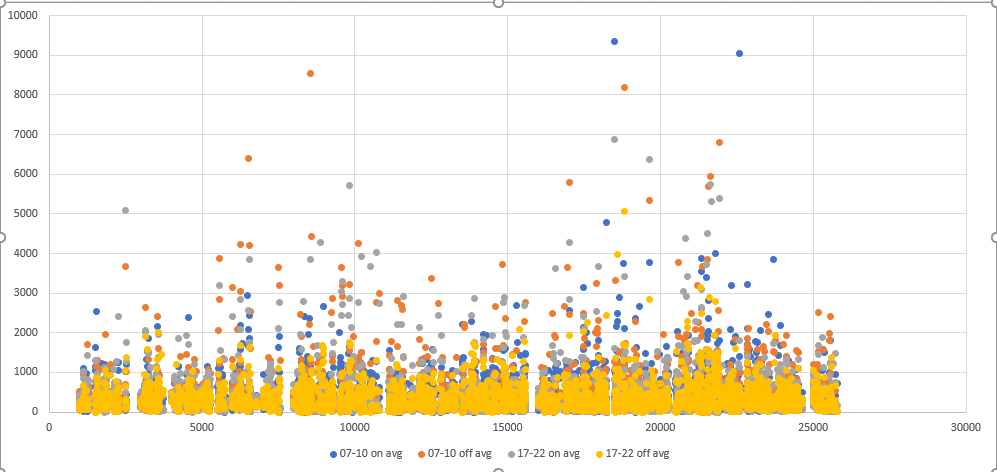

In [121]:
a = pilimg.open('버스 산점도.png')
a

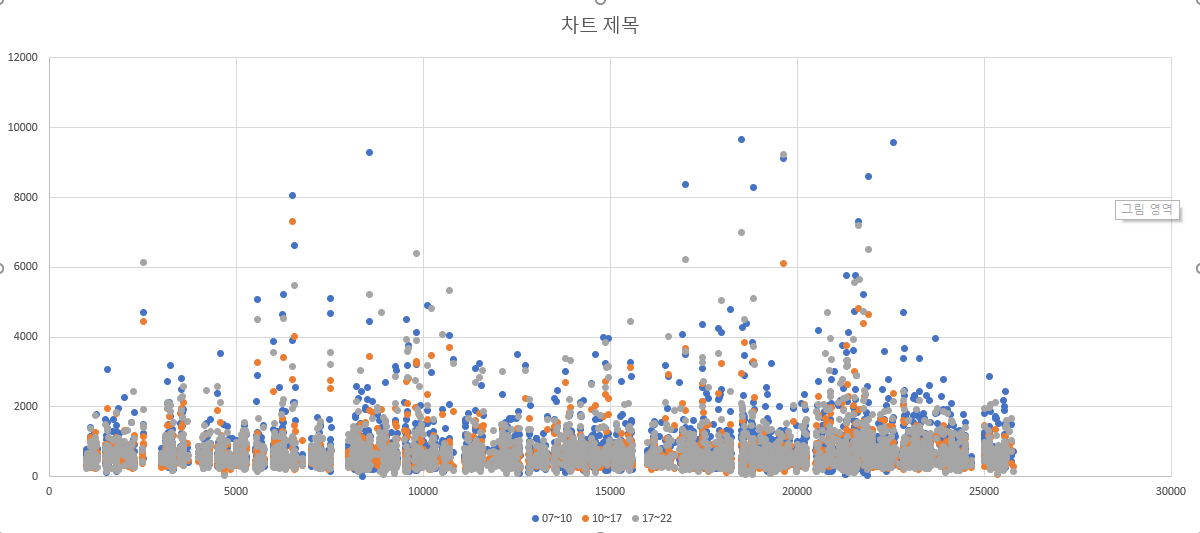

In [122]:
b = pilimg.open('버스 통합 산점도.png')
b

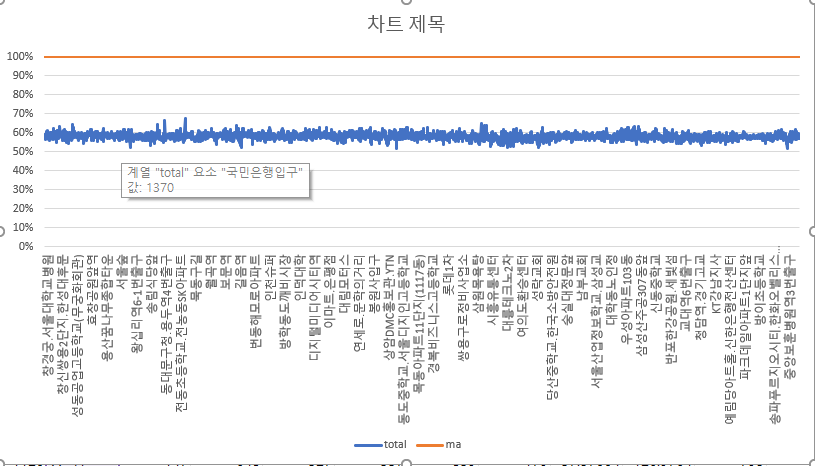

In [123]:
c = pilimg.open('아침 저녁 하루 비교.png')
c

In [124]:
bus.describe()

,Unnamed: 0,code,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y
count,10634.000000,10634.000000,10634.000000,10634.000000,10634.000000,10634.000000,10634.000000,10634.000000,10634.000000,10634.000000
mean,5421.296314,14192.908219,221.599627,201.060271,157.154431,153.319899,174.939092,192.682048,37.551234,126.985233
std,3126.103502,6866.999295,323.760834,361.161958,196.700457,181.153124,328.029529,228.775979,0.055329,0.085210
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.430780,126.798353
25%,2731.250000,8599.250000,46.192188,47.237351,43.032480,52.334821,34.815625,56.863370,37.502644,126.916814
50%,5439.500000,14323.500000,129.429167,109.511349,106.926786,110.582589,93.003125,131.045000,37.550734,126.993371
75%,8123.750000,20215.750000,284.937351,220.763021,204.013393,192.032366,195.243750,249.605357,37.592193,127.050302
max,10830.000000,25990.000000,9349.875000,8534.854167,4187.625000,3263.330357,6873.712500,5054.525000,37.781594,127.180266


- 데이터 조작하기전에 기존데이터 살려놓고하기
- 이부분이 나중에 다시바꾸거나 원본을보고싶을때 제일좋은부분 

In [125]:
bus1=bus

- 정류장별로 의미를 부여하기위해 새로운 칼럼들을 생성
- commute(출퇴근시간)과 Total(전체시간)을 통해 출퇴근시간이 사용하는 비율이 전체시간에 얼마를 차지하나 보기위해

In [126]:
bus1['07-10']=(bus1['07-10 on avg']+bus1['07-10 off avg'])/2 # 07-10 승하차평균
bus1['10-17']=(bus1['10-17 on avg']+bus1['10-17 off avg'])/2 # 10-17 승하차평균
bus1['17-22']=(bus1['17-22 on avg']+bus1['17-22 off avg'])/2 # 17-22 승하차평균
bus1['commute']=bus1['07-10']+bus1['17-22'] # 07-10 승하차평균 ,17-22 승하차평균의 합
bus1['Total']=bus1['07-10']+bus1['17-22']+bus1['10-17'] # 07-10 승하차평균 , 0-17 승하차평균 ,17-22 승하차평균의 합
bus1['com70']=bus1['commute']/bus1['Total'] # commute , Total 나눈것 출퇴근 시간 / 전체 시간
bus1

,Unnamed: 0,code,station,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y,07-10,10-17,17-22,commute,Total,com70
0,0,1001,종로2가사거리,275.317204,163.225806,149.156682,169.762673,154.629032,146.658065,37.569764,126.987786,219.271505,159.459677,150.643548,369.915054,529.374731,0.698777
1,1,1002,창경궁.서울대학교병원,276.752169,487.524164,190.707913,139.964418,181.108550,37.647584,37.579179,126.996520,382.138166,165.336166,109.378067,491.516233,656.852399,0.748290
2,2,1003,명륜3가.성대입구,257.345725,382.850062,254.162507,224.906001,310.292937,119.232714,37.582709,126.998290,320.097893,239.534254,214.762825,534.860719,774.394973,0.690682
3,3,1004,종로2가.삼일교,31.812500,166.361979,108.092634,109.463170,174.043750,100.357812,37.568582,126.987507,99.087240,108.777902,137.200781,236.288021,345.065923,0.684762
4,4,1005,혜화동로터리.여운형활동터,202.938076,276.624506,132.341615,241.552230,108.711462,169.750988,37.586230,127.001694,239.781291,186.946923,139.231225,379.012516,565.959439,0.669681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10629,10822,25758,고덕리엔파크3단지.2단지,51.725490,208.764706,84.764706,155.369748,127.588235,214.141176,37.557130,127.172576,130.245098,120.067227,170.864706,301.109804,421.177031,0.714925
10630,10823,25760,가래여울,1.313725,209.705882,1.915966,107.142857,2.129412,69.129412,37.576545,127.168974,105.509804,54.529412,35.629412,141.139216,195.668627,0.721318
10631,10828,25785,강동리버스트4단지,729.740741,3.037037,295.777778,3.015873,156.333333,3.644444,37.573357,127.170805,366.388889,149.396825,79.988889,446.377778,595.774603,0.749239
10632,10829,25786,강동리버스트4단지,2.296296,194.000000,1.825397,152.968254,3.288889,423.822222,37.572898,127.171137,98.148148,77.396825,213.555556,311.703704,389.100529,0.801088


- 출퇴근인원이 전체나눈 것에 73% 이상이면 1 아니면 0
- 출퇴근 비율이 높은 버스정류장들은 분별하기위해 

In [127]:
bus_ex = []
for x in bus1['com70']:
    if x >= 0.73:
        bus_ex.append(1)
    else:
        bus_ex.append(0)
bus1['com70'] = bus_ex

In [128]:
bus1

,Unnamed: 0,code,station,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y,07-10,10-17,17-22,commute,Total,com70
0,0,1001,종로2가사거리,275.317204,163.225806,149.156682,169.762673,154.629032,146.658065,37.569764,126.987786,219.271505,159.459677,150.643548,369.915054,529.374731,0
1,1,1002,창경궁.서울대학교병원,276.752169,487.524164,190.707913,139.964418,181.108550,37.647584,37.579179,126.996520,382.138166,165.336166,109.378067,491.516233,656.852399,1
2,2,1003,명륜3가.성대입구,257.345725,382.850062,254.162507,224.906001,310.292937,119.232714,37.582709,126.998290,320.097893,239.534254,214.762825,534.860719,774.394973,0
3,3,1004,종로2가.삼일교,31.812500,166.361979,108.092634,109.463170,174.043750,100.357812,37.568582,126.987507,99.087240,108.777902,137.200781,236.288021,345.065923,0
4,4,1005,혜화동로터리.여운형활동터,202.938076,276.624506,132.341615,241.552230,108.711462,169.750988,37.586230,127.001694,239.781291,186.946923,139.231225,379.012516,565.959439,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10629,10822,25758,고덕리엔파크3단지.2단지,51.725490,208.764706,84.764706,155.369748,127.588235,214.141176,37.557130,127.172576,130.245098,120.067227,170.864706,301.109804,421.177031,0
10630,10823,25760,가래여울,1.313725,209.705882,1.915966,107.142857,2.129412,69.129412,37.576545,127.168974,105.509804,54.529412,35.629412,141.139216,195.668627,0
10631,10828,25785,강동리버스트4단지,729.740741,3.037037,295.777778,3.015873,156.333333,3.644444,37.573357,127.170805,366.388889,149.396825,79.988889,446.377778,595.774603,1
10632,10829,25786,강동리버스트4단지,2.296296,194.000000,1.825397,152.968254,3.288889,423.822222,37.572898,127.171137,98.148148,77.396825,213.555556,311.703704,389.100529,1


In [129]:
bus1.com70.value_counts()

0    6982
1    3652
Name: com70, dtype: int64

#### ------------------------- 여기서부턴 무시 #########

In [130]:
# bus_ex = []
# for x in bus1['10-17']:
#     if x > 124:
#         bus_ex.append(1)
#     else:
#         bus_ex.append(0)
# bus1['af80'] = bus_ex

In [131]:
# bus1.af80.value_counts()

AttributeError: 'DataFrame' object has no attribute 'af80'

In [ ]:
# len(bus1[bus1['10-17 on avg'] > 126])-len(bus1[bus1['10-17 on avg'] > 188])

In [ ]:
# len(bus1[bus1['10-17 off avg'] > 122])-len(bus1[bus1['10-17 off avg'] > 184])

## 전처리한 데이터 저장

In [132]:
bus1.to_csv('버스전처리.csv',encoding='cp949')